Мое видение:
Решающие деревья невосприимчивы к выбросам и пропущенным полям, поэтому берём матрицу признаков.  Главное чтобы все признаки были числовыми, потому что дереву нужно сравнивать между собой переменные.   Затем рекурсивно создаём определённые условия по которым наша выборка будет уменьшаться (распределяться).  Для определения того как мы уменьшаем  нашу выборку мы смотрим на информативность,  применяя критерии Джинни, например. И так спускаясь по дереву мы уменьшаем нашу выборку. К примеру, у нас сначала было пять объектов из одного классифицированного объекта,  10 из другого,  пятнадцать из третьего.  А После выбора условия который максимизирует нашу информативность у нас становится три объекта  из первой категории, пять из второй категории и один из третьей категории.  Так мы дальше продолжаем пока не встретим точку остановки, например, это может быть глубина дерева, либо значение информативности до которой мы дошли (например, у нас там один объект из одной категории и там 10 из другой, уже следует на этом этапе остановиться), затем последнему узлу привязываем лист со значением категории которая наиболее вероятна.  Можно это ещё представить так: у нас есть некое линейное пространство и мы на этом линейном пространстве с помощью предикальных условий расчерчиваем это пространство на некоторые прямоугольники и квадраты.  И потом по этой расчерченной области будут предсказываться тестовая выборка.  В алгоритме решающих деревьев нужно предельно внимательно следить за тем чтобы  алгоритм не переобучался.
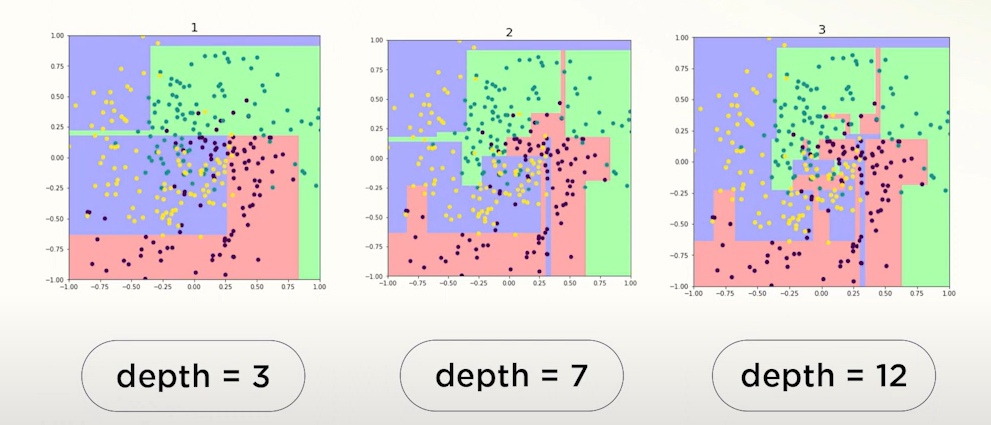

в sklearn под капотом работает CART

In [1]:
# Connecting the necessary libraries
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load IRIS dataset. Take the first two features
iris = datasets.load_iris ()
X = iris.data[: , [0 ,1]];
y = iris.target

In [3]:
# Create train and test split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.3,
random_state =42, stratify=y)

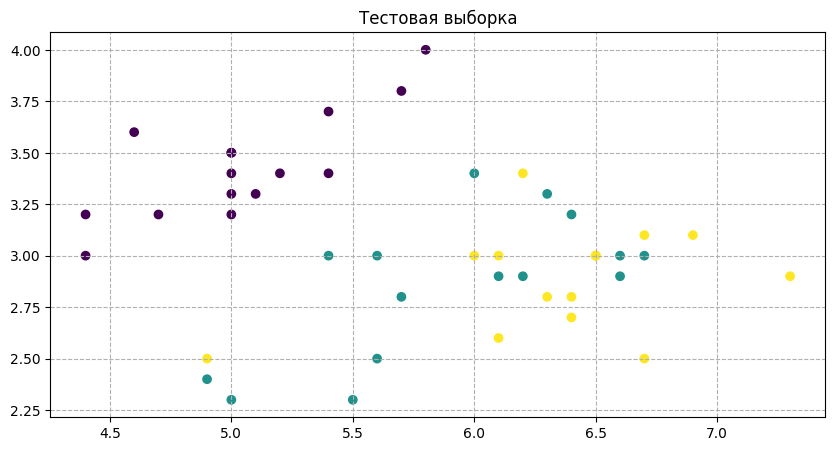

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title("Тестовая выборка")
plt.grid(linestyle="--")
plt.show()

In [5]:
# Feature Scaling using StandardScaler
sc = StandardScaler ()
sc.fit(X_train)
X_train_std = sc.transform(X_train ); X_test_std = sc.transform(X_test)

По умолчанию используется критерий Gini

In [6]:
# Fit the model
model = DecisionTreeClassifier()
model.fit(X_train , y_train)
predicted_y = model.predict(X_test)
errors = predicted_y != y_test

Для визуализации важности признака вы также можете использовать
библиотеку Yellowbrick

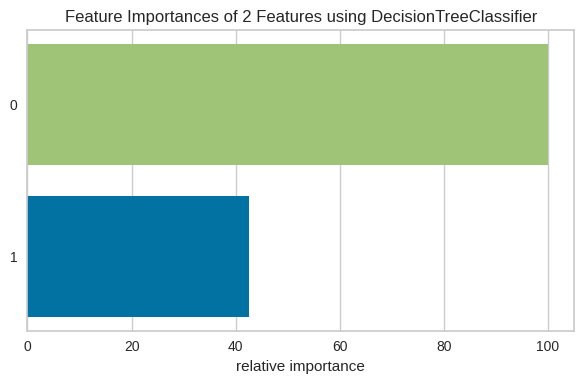

<Axes: title={'center': 'Feature Importances of 2 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [7]:
from yellowbrick.model_selection import FeatureImportances
fig, ах = plt.subplots ( figsize= ( 6, 4 ))
fi_viz = FeatureImportances (model)
fi_viz.fit (X, y)
fi_viz.poof()


Мы можем визуализировать как строилось наше дерево:

[Text(0.43526785714285715, 0.9583333333333334, 'x[0] <= 5.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.25892857142857145, 0.875, 'x[1] <= 2.8\ngini = 0.157\nsamples = 35\nvalue = [32, 3, 0]'),
 Text(0.22321428571428573, 0.7916666666666666, 'x[0] <= 4.75\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.1875, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.25892857142857145, 0.7083333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.29464285714285715, 0.7916666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6116071428571429, 0.875, 'x[0] <= 6.25\ngini = 0.539\nsamples = 70\nvalue = [3, 32, 35]'),
 Text(0.36607142857142855, 0.7916666666666666, 'x[1] <= 3.35\ngini = 0.479\nsamples = 34\nvalue = [3, 23, 8]'),
 Text(0.33035714285714285, 0.7083333333333334, 'x[0] <= 5.55\ngini = 0.383\nsamples = 31\nvalue = [0, 23, 8]'),
 Text(0.29464285714285715, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 T

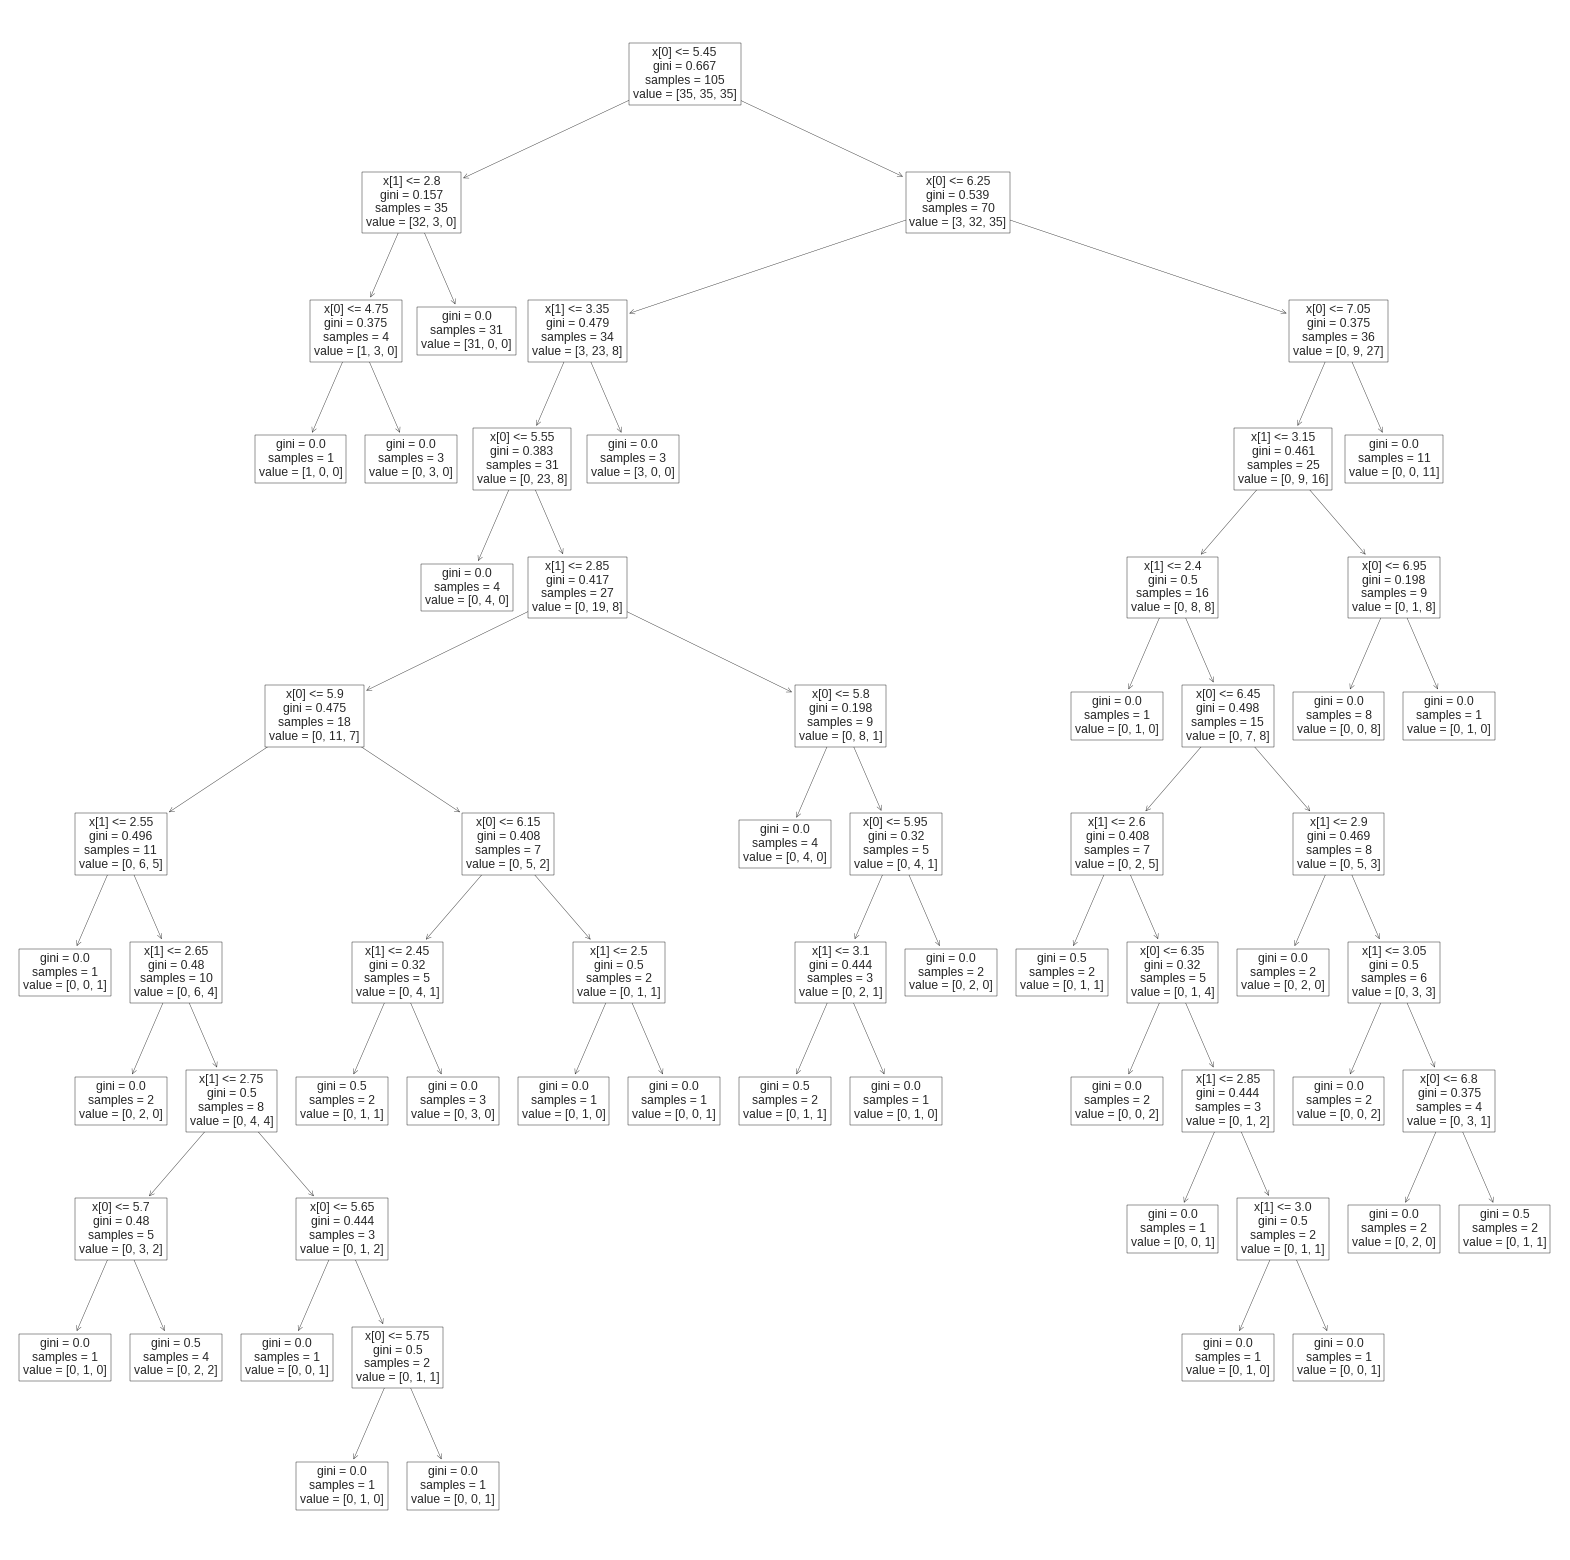

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model)

Мы видим жесткое переобучение

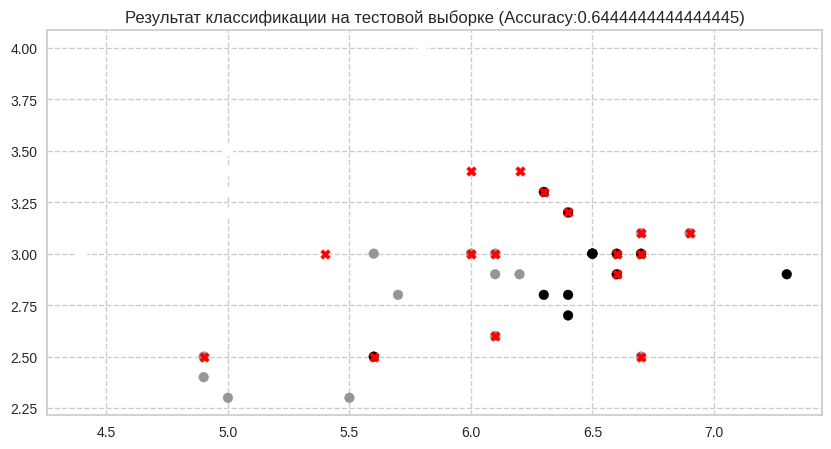

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:,0], X_test[:,1], c=predicted_y)
plt.scatter(X_test[errors,0], X_test[errors,1], c='red', marker="X")
plt.title(f"Результат классификации на тестовой выборке (Accuracy:{(np.count_nonzero(errors == False))/len(errors)})")
plt.grid(linestyle="--")
plt.show()

In [16]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train , y_train)
predicted_y = model.predict(X_test)
errors = predicted_y != y_test

[Text(0.4583333333333333, 0.875, 'x[0] <= 5.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.25, 0.625, 'x[1] <= 2.8\ngini = 0.157\nsamples = 35\nvalue = [32, 3, 0]'),
 Text(0.16666666666666666, 0.375, 'x[0] <= 4.75\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 6.25\ngini = 0.539\nsamples = 70\nvalue = [3, 32, 35]'),
 Text(0.5, 0.375, 'x[1] <= 3.35\ngini = 0.479\nsamples = 34\nvalue = [3, 23, 8]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.383\nsamples = 31\nvalue = [0, 23, 8]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.8333333333333334, 0.375, 'x[0] <= 7.05\ngini = 0.375\nsamples = 36\nvalue = [0, 9, 27]'),
 Text(0.75, 0.125, 'gini = 0.461\nsamples = 25

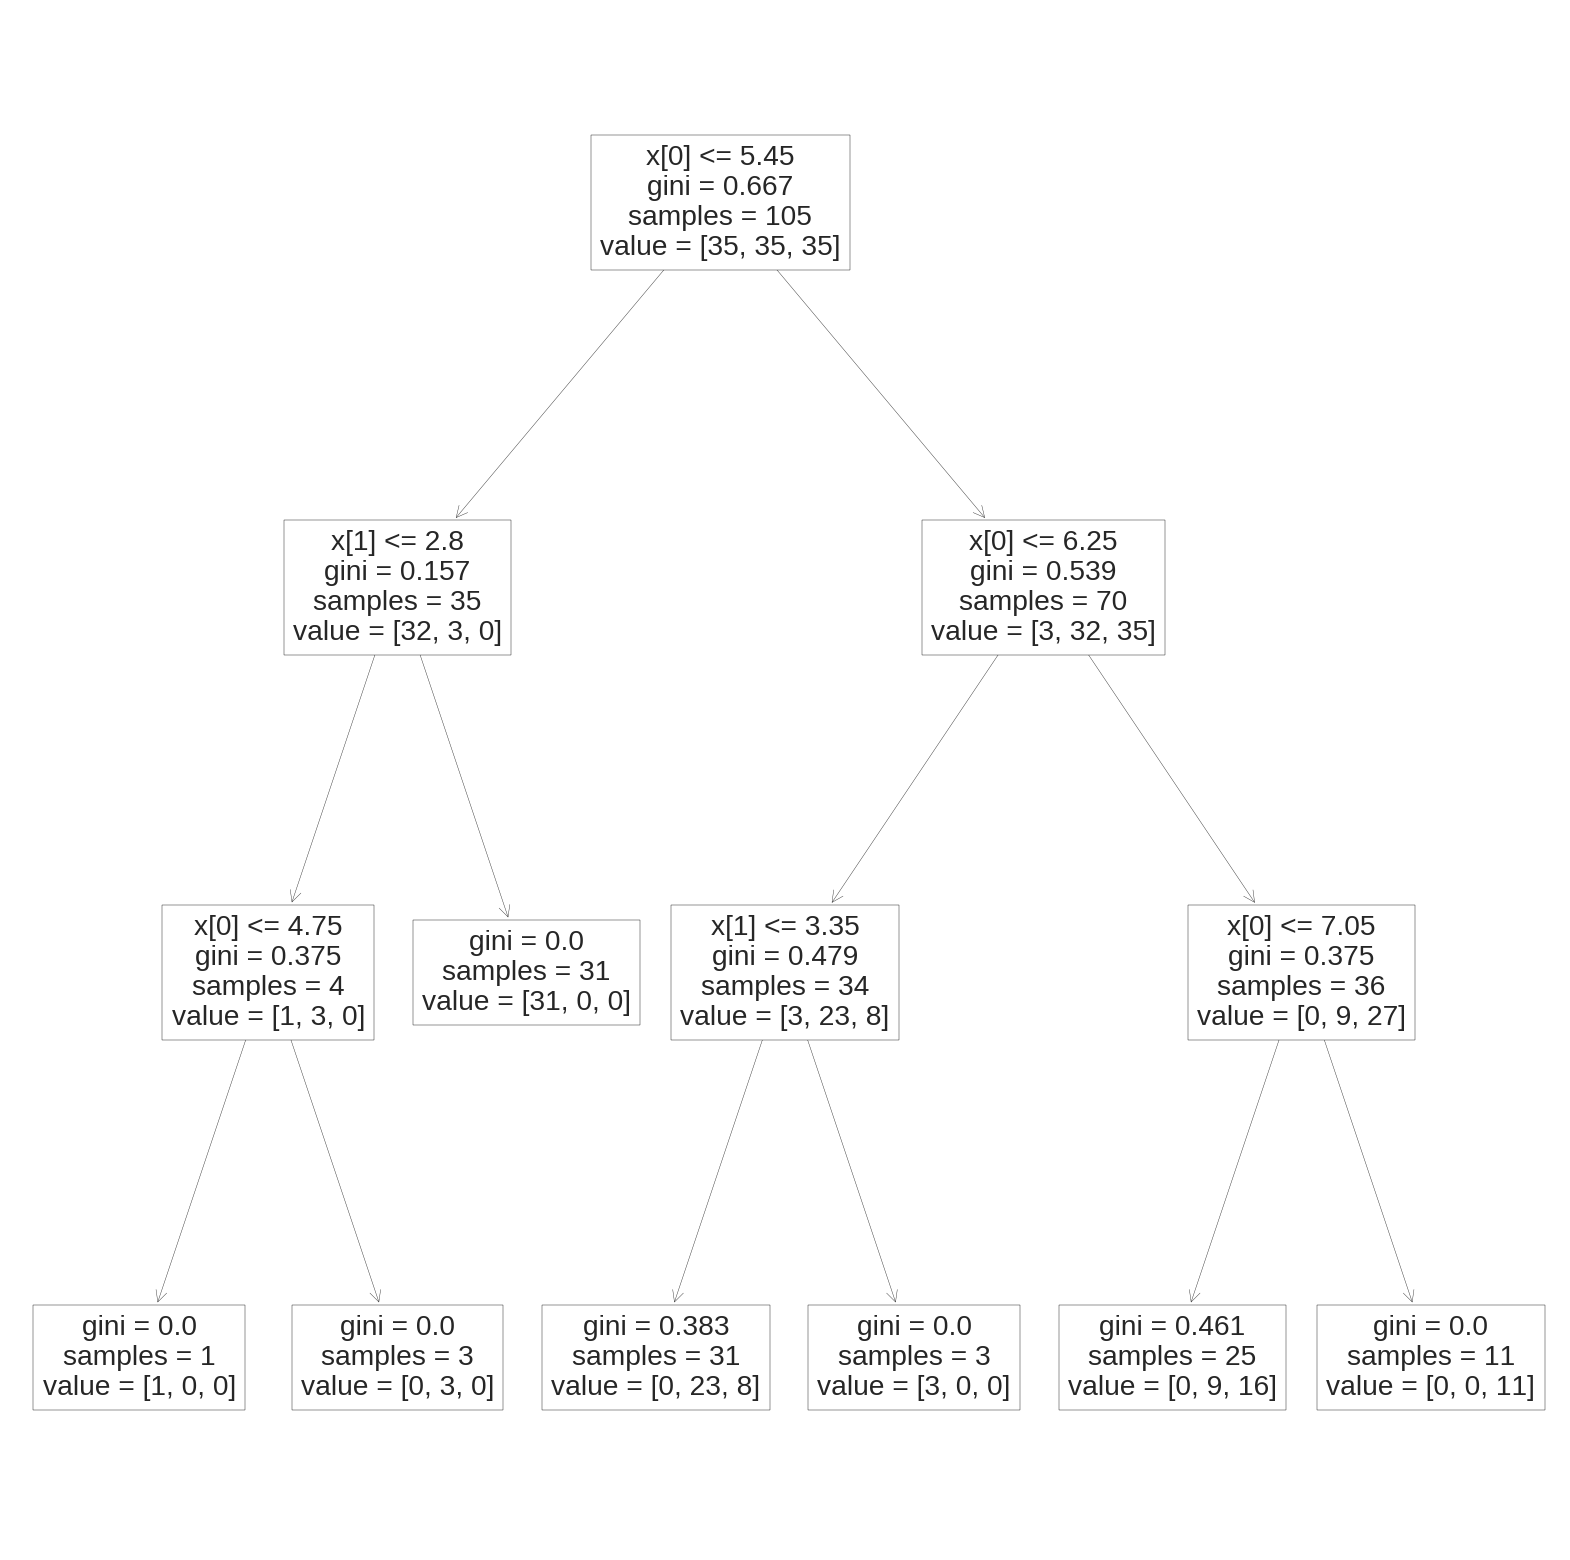

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model)

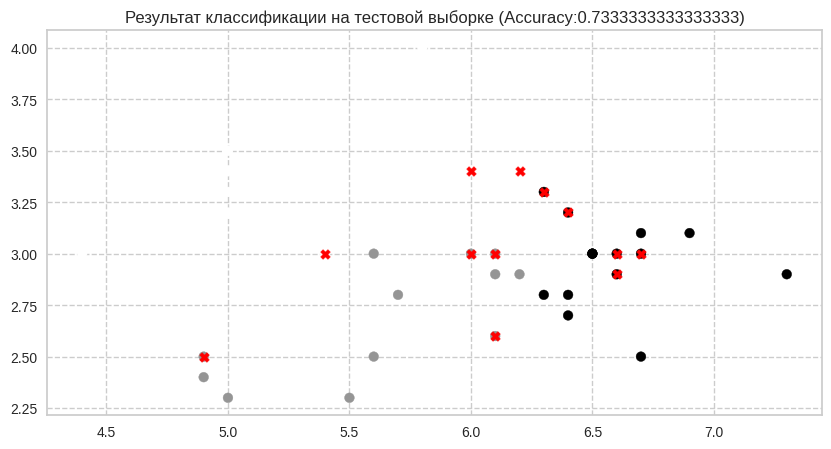

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.scatter(X_test[:,0], X_test[:,1], c=predicted_y)
plt.scatter(X_test[errors,0], X_test[errors,1], c='red', marker="X")
plt.title(f"Результат классификации на тестовой выборке (Accuracy:{(np.count_nonzero(errors == False))/len(errors)})")
plt.grid(linestyle="--")
plt.show()